In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [4]:
#load dataset
df_main = pd.read_csv("https://raw.githubusercontent.com/JonPGallegos/JonPGallegosSchoolProjects/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv")

In [5]:
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df_main.shape

(4340, 8)

In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
df_main['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [9]:
df_main['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [10]:
df_main['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [12]:
df_main.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [13]:
df_main['Age'] = 2022 - df_main['year']       #rewriting Manufacture year as Age
df_main.drop('year',axis=1,inplace=True)

In [14]:
df_main.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [15]:
#renaming Owners as Past_Owners
df_main.rename(columns = {'owner':'Past_Owners'},inplace=True)

In [16]:
df_main['Past_Owners'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Past_Owners, dtype: int64

In [18]:
df_main['Past_Owners'].replace(['First Owner'],1, inplace=True)
df_main['Past_Owners'].replace(['Second Owner'],2, inplace=True)
df_main['Past_Owners'].replace(['Third Owner'],3, inplace=True)
df_main['Past_Owners'].replace(['Fourth & Above Owner'],4, inplace=True)
df_main['Past_Owners'].replace(['Test Drive Car'],0, inplace=True)

In [19]:
df_main['Past_Owners'].value_counts()

1    2832
2    1106
3     304
4      81
0      17
Name: Past_Owners, dtype: int64

In [20]:
#numerical stats
df_main.describe()

,selling_price,km_driven,Past_Owners,Age
count,4.340000e+03,4340.000000,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,1.447005,8.909217
std,5.785487e+05,46644.102194,0.712191,4.215344
min,2.000000e+04,1.000000,0.000000,2.000000
25%,2.087498e+05,35000.000000,1.000000,6.000000
50%,3.500000e+05,60000.000000,1.000000,8.000000
75%,6.000000e+05,90000.000000,2.000000,11.000000
max,8.900000e+06,806599.000000,4.000000,30.000000


In [21]:
df_main.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,Past_Owners,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,1,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,1,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,1,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,1,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,2,8


In [22]:
df_main.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'Past_Owners', 'Age'],
      dtype='object')

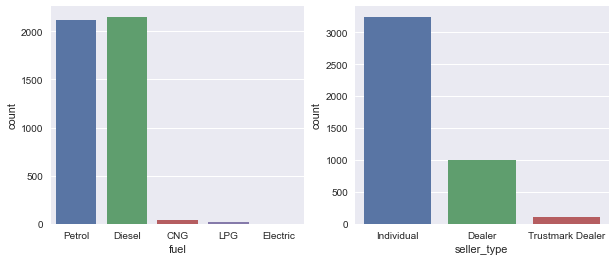

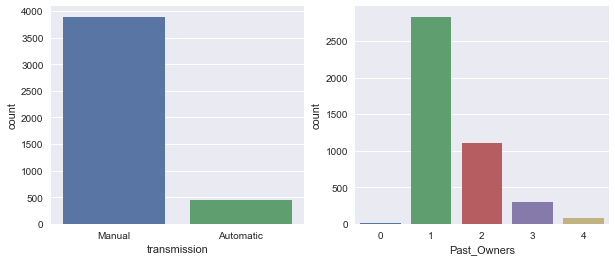

In [23]:
cat_cols = ['fuel','seller_type','transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

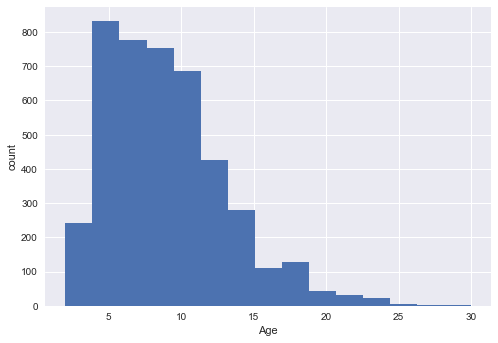

In [24]:
plt.hist(df_main['Age'],bins=15)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

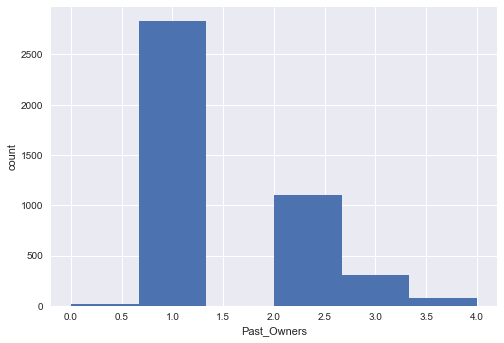

In [25]:
plt.hist(df_main['Past_Owners'],bins=6)
plt.xlabel('Past_Owners')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='Age'>

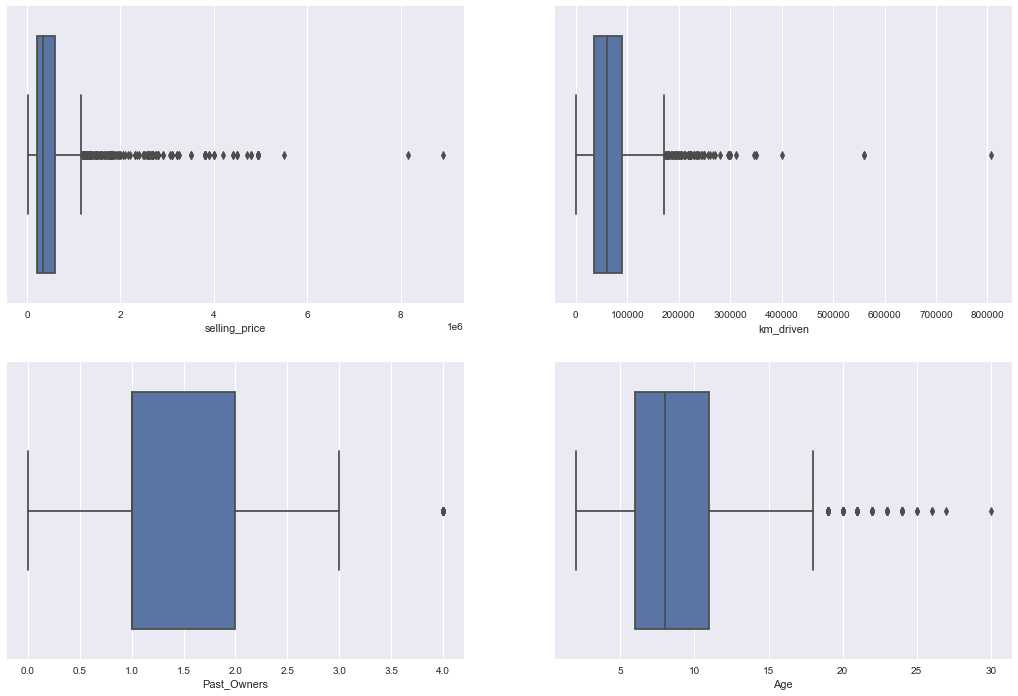

In [26]:
fig, ax= plt.subplots(nrows= 2, ncols = 2, figsize= (18,12))

sns.boxplot(df_main['selling_price'],data=df_main, ax=ax[0][0])
sns.boxplot(df_main['km_driven'], ax=ax[0][1])
sns.boxplot(df_main['Past_Owners'], ax=ax[1][0])
sns.boxplot(df_main['Age'], ax=ax[1][1])

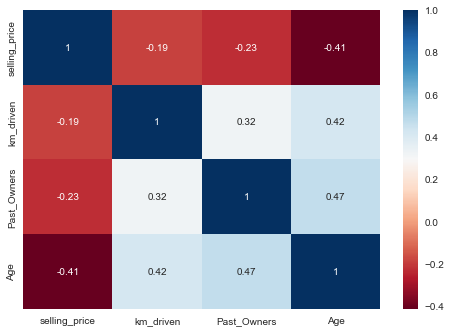

In [27]:
sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [28]:
df_main.corr()['selling_price']

selling_price    1.000000
km_driven       -0.192289
Past_Owners     -0.228091
Age             -0.413922
Name: selling_price, dtype: float64

In [31]:
# copy the data
nor =['km_driven', 'Past_Owners', 'Age']

# apply normalization techniques
for i in nor:
        df_main[i]= (df_main[i] - np.min(df_main[i])) / (np.max(df_main[i]) - np.min(df_main[i]))
# view normalized data
df_main

,name,selling_price,km_driven,fuel,seller_type,transmission,Past_Owners,Age
0,Maruti 800 AC,60000,0.086783,Petrol,Individual,Manual,0.25,0.464286
1,Maruti Wagon R LXI Minor,135000,0.061988,Petrol,Individual,Manual,0.25,0.464286
2,Hyundai Verna 1.6 SX,600000,0.123976,Diesel,Individual,Manual,0.25,0.285714
3,Datsun RediGO T Option,250000,0.057028,Petrol,Individual,Manual,0.25,0.107143
4,Honda Amaze VX i-DTEC,450000,0.174807,Diesel,Individual,Manual,0.50,0.214286
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,0.099181,Diesel,Individual,Manual,0.50,0.214286
4336,Hyundai i20 Magna 1.4 CRDi,409999,0.099181,Diesel,Individual,Manual,0.50,0.214286
4337,Maruti 800 AC BSIII,110000,0.102900,Petrol,Individual,Manual,0.50,0.392857
4338,Hyundai Creta 1.6 CRDi SX Option,865000,0.111579,Diesel,Individual,Manual,0.25,0.142857


In [32]:
df_main.drop(labels='name',axis= 1, inplace = True)

In [33]:
df_main.head()

,selling_price,km_driven,fuel,seller_type,transmission,Past_Owners,Age
0,60000,0.086783,Petrol,Individual,Manual,0.25,0.464286
1,135000,0.061988,Petrol,Individual,Manual,0.25,0.464286
2,600000,0.123976,Diesel,Individual,Manual,0.25,0.285714
3,250000,0.057028,Petrol,Individual,Manual,0.25,0.107143
4,450000,0.174807,Diesel,Individual,Manual,0.50,0.214286


In [34]:
df_main['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [35]:
df_copy = df_main.copy()

In [36]:
df_copy.head()

,selling_price,km_driven,fuel,seller_type,transmission,Past_Owners,Age
0,60000,0.086783,Petrol,Individual,Manual,0.25,0.464286
1,135000,0.061988,Petrol,Individual,Manual,0.25,0.464286
2,600000,0.123976,Diesel,Individual,Manual,0.25,0.285714
3,250000,0.057028,Petrol,Individual,Manual,0.25,0.107143
4,450000,0.174807,Diesel,Individual,Manual,0.50,0.214286


In [37]:
 df_main = pd.get_dummies(data = df_main)

In [38]:
df_main.head()

,selling_price,km_driven,Past_Owners,Age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,60000,0.086783,0.25,0.464286,0,0,0,0,1,0,1,0,0,1
1,135000,0.061988,0.25,0.464286,0,0,0,0,1,0,1,0,0,1
2,600000,0.123976,0.25,0.285714,0,1,0,0,0,0,1,0,0,1
3,250000,0.057028,0.25,0.107143,0,0,0,0,1,0,1,0,0,1
4,450000,0.174807,0.50,0.214286,0,1,0,0,0,0,1,0,0,1


In [39]:
df_main.columns

Index(['selling_price', 'km_driven', 'Past_Owners', 'Age', 'fuel_CNG',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual'],
      dtype='object')

In [40]:
# Separating target variable and its features
y = df_main['selling_price']
X = df_main.drop('selling_price',axis=1).astype(float)

In [41]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [42]:
model = sm.OLS(y, X)
model = model.fit()
model.params

km_driven                      -787004.500260
Past_Owners                     -79837.645940
Age                            -997497.174563
fuel_CNG                        266446.011766
fuel_Diesel                     551941.962516
fuel_Electric                  -356821.919625
fuel_LPG                        312229.647591
fuel_Petrol                     262006.478737
seller_type_Dealer              313621.497096
seller_type_Individual          242848.642235
seller_type_Trustmark Dealer    479332.041655
transmission_Automatic          952360.782195
transmission_Manual              83441.398791
dtype: float64

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     366.6
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:03:34   Log-Likelihood:                -62411.
No. Observations:                4340   AIC:                         1.248e+05
Df Residuals:                    4329   BIC:                         1.249e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
km_driven                     -7.87e+05   1.36e+05     -5.804      0.000   -1.05e+06   -5.21e+05
Past_Owners                  -7.984e+04   4.25e+04     -1.877      0.061   -1.63e+05    3571.546
Age                          -9.975e+05   5.35e+04    -18.644      0.000    -1.1e+06   -8.93e+05
fuel_CNG                      2.664e+05   9.05e+04      2.943      0.003     8.9e+04    4.44e+05
fuel_Diesel                   5.519e+05   7.18e+04      7.691      0.000    4.11e+05    6.93e+05
fuel_Electric                -3.568e+05   3.59e+05     -0.995      0.320   -1.06e+06    3.46e+05
fuel_LPG                      3.122e+05   1.02e+05      3.050      0.002    1.12e+05    5.13e+05
fuel_Petrol                    2.62e+05   7.17e+04      3.655      0.000    1.21e+05    4.03e+05
seller_type_Dealer            3.136e+05   3.18e+04      9.852      0.000    2.51e+05    3.76e+05
seller_type_Individual        2.428e+05    3.2e+04      7.598      0.000     1.8e+05    3.06e+05
seller_type_Trustmark Dealer  4.793e+05   4.37e+04     10.975      0.000    3.94e+05    5.65e+05
transmission_Automatic        9.524e+05   4.57e+04     20.855      0.000    8.63e+05    1.04e+06
transmission_Manual           8.344e+04   4.48e+04      1.862      0.063   -4436.426    1.71e+05
==============================================================================
Omnibus:                     4368.888   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           502954.806
Skew:                           4.659   Prob(JB):                         0.00
Kurtosis:                      54.908   Cond. No.                     2.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
X_filtered= X.drop(['fuel_Electric'],axis=1)

In [45]:
X_filtered.columns

Index(['km_driven', 'Past_Owners', 'Age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.30, random_state=20)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3038, 12)
x test:  (1302, 12)
y train:  (3038,)
y test:  (1302,)


In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print('coeffients:',ridge.coef_)
print('-----------------------------------------------------')
print('intercept:',ridge.intercept_)
print('-----------------------------------------------------')
print('R2-Score:',ridge.score(X_test, y_test))

coeffients: [-710537.98902066 -131713.24392353 -882820.63943373 -116191.77746643
  135273.23589435  -73029.50117084 -129607.50238706   23695.55922563
  -48061.51733131  205238.95037296  405678.95764597 -405678.95764597]
-----------------------------------------------------
intercept: 1169299.097016521
-----------------------------------------------------
R2-Score: 0.43563739266011536


In [49]:
from locale import normalize
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print('coeffients:',lasso.coef_)
print('-----------------------------------------------------')
print('intercept:',lasso.intercept_)
print('-----------------------------------------------------')
print('R2-Score:',lasso.score(X_test,y_test))

coeffients: [-7.21675432e+05 -1.04437370e+05 -9.71948116e+05 -0.00000000e+00
  2.69427124e+05  6.21981799e+04 -5.49140097e+03  3.03118428e+04
 -3.61965728e+04  2.26638432e+05  8.47064352e+05 -4.20972627e-08]
-----------------------------------------------------
intercept: 633163.8669866598
-----------------------------------------------------
R2-Score: 0.43991662887097227


In [50]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [51]:
CV = []
R2_train = []
R2_test = []
def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    mse_train = mean_squared_error(y_train,y_pred_train)
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    mse_test=mean_squared_error(y_test,y_pred_test)
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train mse-score :",round(mse_train,2))
    print("Test mse-score :",round(mse_test,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.show()

Train R2-score : 0.47
Test R2-score : 0.44
Train mse-score : 164302572650.96
Test mse-score : 221578773391.43
Train CV scores : [0.49240014 0.3648809  0.50107349 0.48486788 0.46972155]
Train CV mean : 0.46


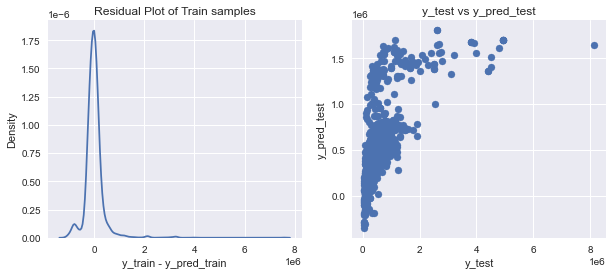

coeffients: [-721770.98122491 -104451.32343538 -971950.63630291  -81581.6457903
  187886.01299802  -19257.70075604  -87046.66645169  -43280.26266189
 -109792.90869415  153073.17135605  423538.29121923 -423538.29121923]
intercept: 1211857.0473111866


In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")
print('coeffients:',lr.coef_)
print('intercept:',lr.intercept_)

Train R2-score : 0.47
Test R2-score : 0.44
Train mse-score : 164308725911.3
Test mse-score : 221678113743.63
Train CV scores : [0.49227444 0.36413493 0.50143746 0.48470748 0.46982562]
Train CV mean : 0.46


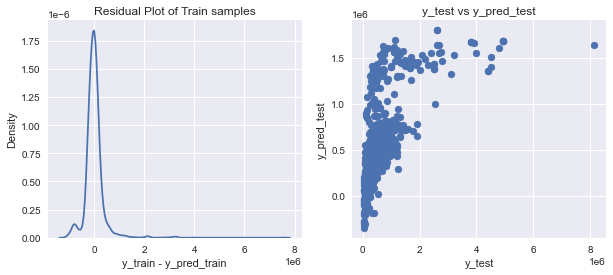

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))
car_pred_model(rg_rs,"ridge.pkl")

In [55]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.47
Test R2-score : 0.44
Train mse-score : 164302719481.07
Test mse-score : 221503973444.16
Train CV scores : [0.49216978 0.36499275 0.5008215  0.4848472  0.46977831]
Train CV mean : 0.46


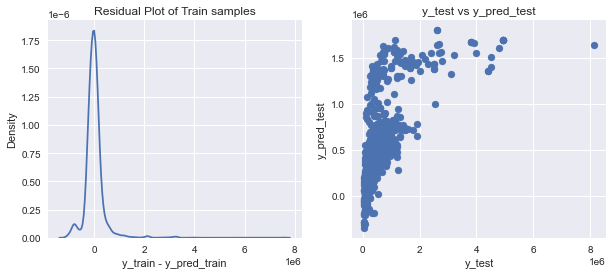

In [56]:
car_pred_model(ls_rs,"lasso.pkl")

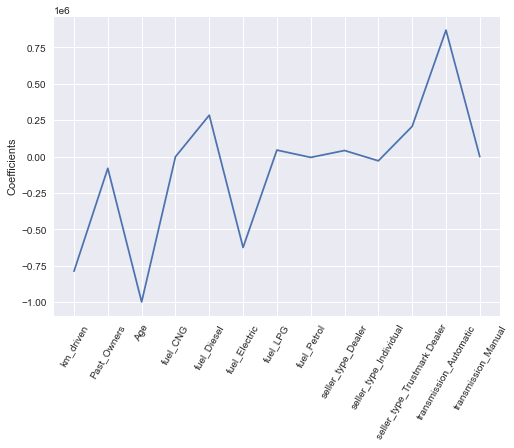

In [57]:
from matplotlib import axis
cols = df_main.drop('selling_price', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(cols)), lasso_coef)
_ = plt.xticks(range(len(cols)), cols, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

In [58]:
y = df_copy['transmission'].replace(['Automatic','Manual'],[0,1])
X = df_main.drop(['transmission_Automatic','transmission_Manual'],axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3038, 12)
x test:  (1302, 12)
y train:  (3038,)
y test:  (1302,)


In [60]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
#importing libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

#Navie bayes using Gaussian Naive Bayes
NB_model = GaussianNB().fit(X_train,y_train)

NB_pred = NB_model.predict(X_test)

Accuracy Score is 83.487
     0     1
0   30    90
1  125  1057
[[0.25       0.75      ]
 [0.10575296 0.89424704]]


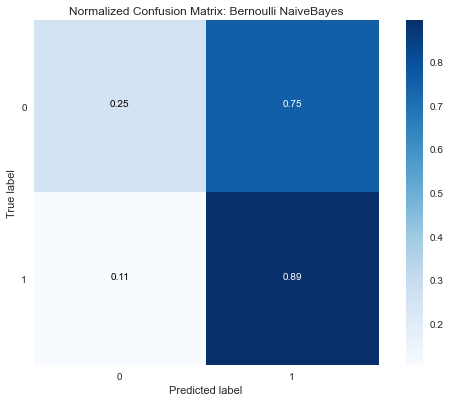

In [62]:
#Navie bayes using Bernoulli Naive Bayes
NBB_model = BernoulliNB().fit(X_train,y_train)
NBB_pred = NBB_model.predict(X_test)


from sklearn.metrics import accuracy_score


print('Accuracy Score is {:.5}'.format(accuracy_score(y_test,NBB_pred)*100))
print(pd.DataFrame(confusion_matrix(y_test,NBB_pred)))

sns.set_style('white')
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,NBB_pred), classes= class_names, normalize = True, title='Normalized Confusion Matrix: Bernoulli NaiveBayes')

Accuracy Score is 93.088
    0     1
0  55    65
1  25  1157
[[0.45833333 0.54166667]
 [0.02115059 0.97884941]]


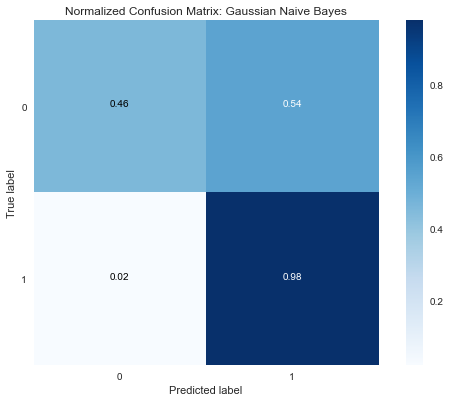

In [63]:
from sklearn.metrics import accuracy_score


print('Accuracy Score is {:.5}'.format(accuracy_score(y_test,NB_pred)*100))
print(pd.DataFrame(confusion_matrix(y_test,NB_pred)))


sns.set_style('white')
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,NB_pred), classes= class_names, normalize = True, title='Normalized Confusion Matrix: Gaussian Naive Bayes')

In [64]:
#importing metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [65]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.69      0.46      0.55       120
           1       0.95      0.98      0.96      1182

    accuracy                           0.93      1302
   macro avg       0.82      0.72      0.76      1302
weighted avg       0.92      0.93      0.92      1302



In [66]:
print("Precision score : {} %".format(precision_score(y_test,NB_pred)*100))
print("Recall score : {} %".format(recall_score(y_test,NB_pred)*100))
print("AUC_score is {}%".format(roc_auc_score(y_test,NB_pred)*100))
print("Accuracy is {}%".format(accuracy_score(y_test,NB_pred)*100))

Precision score : 94.68085106382979 %
Recall score : 97.88494077834179 %
AUC_score is 71.85913705583756%
Accuracy is 93.08755760368663%


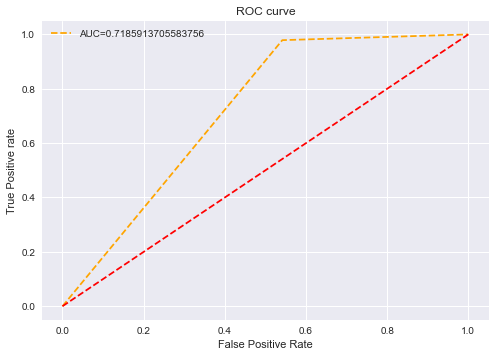

In [67]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn import metrics



# model = LogisticRegression(C=0.8, random_state=0,solver='lbfgs')
# model.fit(X_train, y_train)
# Y_predict = model.predict(X_test)

#define metrics
#y_pred_proba = log_regression.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, NB_pred)

auc = metrics.roc_auc_score(y_test, NB_pred)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [ ]:
!wget -nc https://raw.githubusercontent.com/suewsu875/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MATH646-Project.ipynb',notebookpath="/content/drive/MyDrive/ColabNotebooks/")